## Made by Krish Bansal 23115069

# Handling Imbalanced Datasets with Sampling Techniques

## 1. Getting Started: Libraries and Data Loading

Let's begin by importing all the necessary libraries and loading our dataset. Make sure your ` creditcard.csv ` file is in the same folder as this notebook.

In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


data = pd.read_csv('creditcard.csv')


print(data.head())


X = data.drop('Class', axis=1)
y = data['Class']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"Training Shape: {X_train_scaled.shape}")
print(f"Test Shape: {X_test_scaled.shape}")

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

## 2. Balancing the Dataset

Imbalanced data can really throw off our model. In this section, we'll apply different sampling methods to our training set. We'll use the imbalanced-learn library.

In [18]:
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler, TomekLinks

# Random Oversampling
ros = RandomOverSampler(random_state=42)
X_train_ros, y_train_ros = ros.fit_resample(X_train_scaled, y_train)
print(f"After Random Oversampling: {X_train_ros.shape}")

# Random Undersampling
rus = RandomUnderSampler(random_state=42)
X_train_rus, y_train_rus = rus.fit_resample(X_train_scaled, y_train)
print(f"After Random Undersampling: {X_train_rus.shape}")

# Tomek Links
tl = TomekLinks()
X_train_tl, y_train_tl = tl.fit_resample(X_train_scaled, y_train)
print(f"After applying Tomek Links: {X_train_tl.shape}")

# SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)
print(f"After SMOTE: {X_train_smote.shape}")


After Random Oversampling: (398040, 30)
After Random Undersampling: (688, 30)
After applying Tomek Links: (199346, 30)
After SMOTE: (398040, 30)


### 2.1 Visualizing the Class Distributions

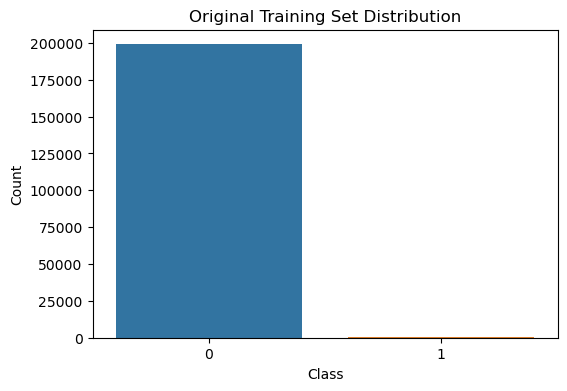

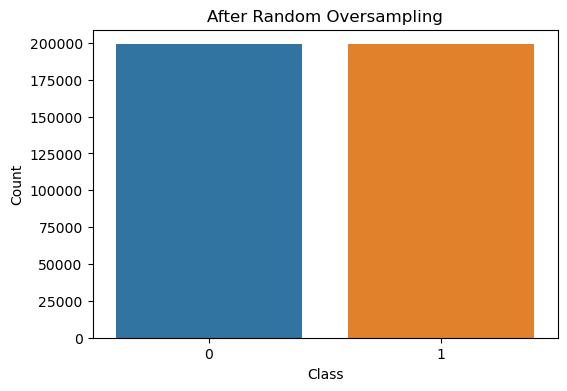

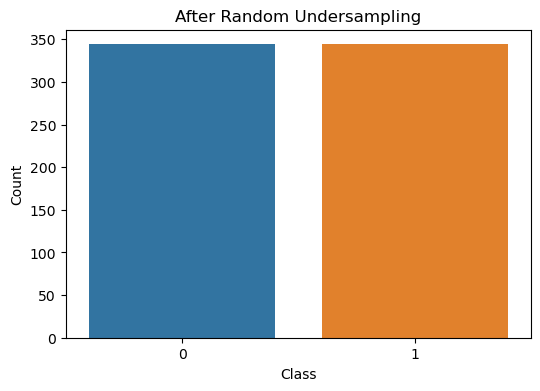

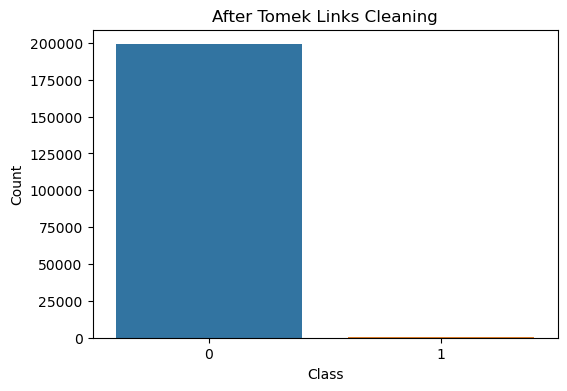

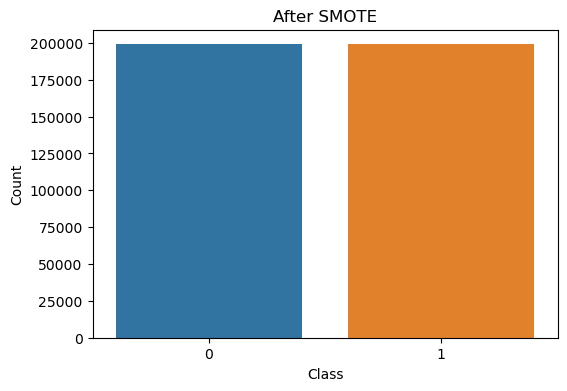

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_class_distribution(labels, title):
    plt.figure(figsize=(6,4))
    sns.countplot(x=labels)
    plt.title(title)
    plt.xlabel('Class')
    plt.ylabel('Count')
    plt.show()

plot_class_distribution(y_train, "Original Training Set Distribution")
plot_class_distribution(y_train_ros, "After Random Oversampling")
plot_class_distribution(y_train_rus, "After Random Undersampling")
plot_class_distribution(y_train_tl, "After Tomek Links Cleaning")
plot_class_distribution(y_train_smote, "After SMOTE")

## 3. Training and Evaluating Our Models

Now We'll use a Decision Tree classifier. We'll train separate models on the original data and on each resampled dataset. 

We'll evaluate the models using three metrics:

- **Accuracy:** Overall correctness of predictions (can be misleading on imbalanced data).
- **F1 Score:** Harmonic mean of precision and recall, great for imbalanced classes.
- **AUC:** Measures the ability of the model to distinguish between classes.

In [20]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score

def train_and_evaluate(X_train_data, y_train_data, X_test_data, y_test_data, model, description="Model"):
    model.fit(X_train_data, y_train_data)
    y_pred = model.predict(X_test_data)
    y_prob = model.predict_proba(X_test_data)[:, 1]
    accuracy = accuracy_score(y_test_data, y_pred)
    f1 = f1_score(y_test_data, y_pred)
    auc = roc_auc_score(y_test_data, y_prob)
    print(f"{description} -> Accuracy: {accuracy:.4f}, F1 Score: {f1:.4f}, AUC: {auc:.4f}")
    return accuracy, f1, auc


results = {}

# 1. Original imbalanced data
model_orig = DecisionTreeClassifier(random_state=42)
results['Original'] = train_and_evaluate(X_train_scaled, y_train, X_test_scaled, y_test, model_orig, "Original Data")

# 2. Random Oversampling
model_ros = DecisionTreeClassifier(random_state=42)
results['Random Oversampling'] = train_and_evaluate(X_train_ros, y_train_ros, X_test_scaled, y_test, model_ros, "Random Oversampling")

# 3. Random Undersampling
model_rus = DecisionTreeClassifier(random_state=42)
results['Random Undersampling'] = train_and_evaluate(X_train_rus, y_train_rus, X_test_scaled, y_test, model_rus, "Random Undersampling")

# 4. Tomek Links
model_tl = DecisionTreeClassifier(random_state=42)
results['Tomek Links'] = train_and_evaluate(X_train_tl, y_train_tl, X_test_scaled, y_test, model_tl, "Tomek Links")

# 5. SMOTE
model_smote = DecisionTreeClassifier(random_state=42)
results['SMOTE'] = train_and_evaluate(X_train_smote, y_train_smote, X_test_scaled, y_test, model_smote, "SMOTE")

# 6. Class Weighting: Adjust model without changing data
model_weighted = DecisionTreeClassifier(random_state=42, class_weight='balanced')
results['Class Weighting'] = train_and_evaluate(X_train_scaled, y_train, X_test_scaled, y_test, model_weighted, "Class Weighting")

# Convert our results dictionary into a DataFrame for easy viewing
results_df = pd.DataFrame(results, index=["Accuracy", "F1 Score", "AUC"]).T
print("\nSummary of Model Performance:")
print(results_df)

Original Data -> Accuracy: 0.9992, F1 Score: 0.7569, AUC: 0.8681
Random Oversampling -> Accuracy: 0.9991, F1 Score: 0.7163, AUC: 0.8410
Random Undersampling -> Accuracy: 0.8867, F1 Score: 0.0265, AUC: 0.8893
Tomek Links -> Accuracy: 0.9991, F1 Score: 0.7448, AUC: 0.8647
SMOTE -> Accuracy: 0.9971, F1 Score: 0.4632, AUC: 0.8603
Class Weighting -> Accuracy: 0.9991, F1 Score: 0.7174, AUC: 0.8343

Summary of Model Performance:
                      Accuracy  F1 Score       AUC
Original              0.999181  0.756944  0.868062
Random Oversampling   0.999064  0.716312  0.841023
Random Undersampling  0.886673  0.026541  0.889278
Tomek Links           0.999134  0.744828  0.864666
SMOTE                 0.997097  0.463203  0.860273
Class Weighting       0.999087  0.717391  0.834289


## 4. Comparing Performance with a Plot

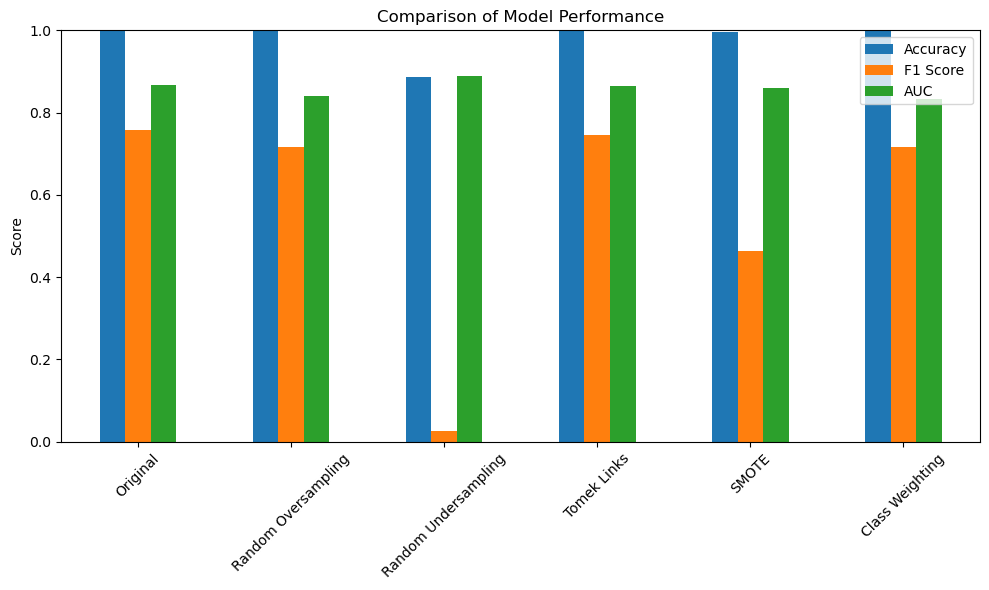

In [21]:
import matplotlib.pyplot as plt

results_df.plot(kind='bar', figsize=(10,6))
plt.title('Comparison of Model Performance')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.tight_layout()
plt.show()

## Thanks for Reading my Code :)